# Student Alcohol Consumption Analysiss

## Introduction
This Jupyter Notebook aims to analyze the factors influencing alcohol consumption among secondary school students. By exploring the dataset, we will gain insights into how various social, educational, and personal factors affect students' alcohol consumption patterns and academic performance.

## Table of Contents
1. [Package Installation](#package-installation)
2. [Library Imports](#library-imports)
3. [Data Loading](#data-loading)
4. [Initial Data Exploration](#initial-data-exploration)
5. [Data Visualization](#data-visualization)
6. [Correlation Analysis](#correlation-analysis)
7. [Data Preparation](#data-preparation)
8. [Modeling](#modeling)
9. [Model Evaluation](#model-evaluation)
10. [Conclusion and Next Steps](#conclusion-and-next-steps)

## Package Installation <a name="package-installation"></a>
In this cell, we will install the necessary Python packages required for our data analysis project. This step ensures that all the libraries needed for data manipulation, visualization, and machine learning are available in our environment. 

We will use the `pip` command to install the following libraries:

- **NumPy**: A library for numerical computations and handling arrays.
- **Pandas**: A powerful data manipulation and analysis library, particularly useful for working with structured data.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive graphics.
- **Scikit-learn**: A machine learning library that provides simple and efficient tools for data mining and data analysis.

In [27]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")

if __name__ == "__main__":
    check_libraries(required_libraries)

The following libraries are missing: scikit-learn
Starting installation...
Installing scikit-learn...
scikit-learn installed successfully.
Error: scikit-learn was not installed correctly.
Some libraries were not installed correctly.


## Library Imports <a name="library-imports"></a>
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Loading <a name="data-loading"></a>
Here, we will load the dataset containing information about students' alcohol consumption and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [29]:
# Paths to the CSV files
path_data_math = '../data/student-mat.csv'
path_data_port = '../data/student-por.csv'

# Reading the CSV files
data_math = pd.read_csv(path_data_math)
data_port = pd.read_csv(path_data_port)

In [30]:
# Display the first few rows of each dataset to verify the reading
print("Mathematics Data:")
print(data_math.head())
print("\nPortuguese Data:")
print(data_port.head())

Mathematics Data:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Portuguese Data:
  school sex  age address famsize Pstatus  Medu  Fed

In [31]:
# Concatenating the two DataFrames
combined_data = pd.merge(data_math, data_port, on=["school", "sex", "age", "address", "famsize", 
                             "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", 
                             "reason", "nursery", "internet"],
                             suffixes=('_math', '_port'))

# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", combined_data.shape)


Shape of Combined Data: (382, 53)


## Initial Data Exploration <a name="initial-data-exploration"></a>
In this section, we will perform an exploratory data analysis (EDA) to understand the dataset better. We will look at the data types, summary statistics, and any missing values, which will help us determine the next steps for cleaning and preparing the data.

In [32]:
# 1. Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 school             0
sex                0
age                0
address            0
famsize            0
Pstatus            0
Medu               0
Fedu               0
Mjob               0
Fjob               0
reason             0
guardian_math      0
traveltime_math    0
studytime_math     0
failures_math      0
schoolsup_math     0
famsup_math        0
paid_math          0
activities_math    0
nursery            0
higher_math        0
internet           0
romantic_math      0
famrel_math        0
freetime_math      0
goout_math         0
Dalc_math          0
Walc_math          0
health_math        0
absences_math      0
G1_math            0
G2_math            0
G3_math            0
guardian_port      0
traveltime_port    0
studytime_port     0
failures_port      0
schoolsup_port     0
famsup_port        0
paid_port          0
activities_port    0
higher_port        0
romantic_port      0
famrel_port        0
freetime_port      0
goout_port         0
Da

In [33]:
# 2. Check data types
data_types = combined_data.dtypes
print("\nData Types of Each Column:\n", data_types)


Data Types of Each Column:
 school             object
sex                object
age                 int64
address            object
famsize            object
Pstatus            object
Medu                int64
Fedu                int64
Mjob               object
Fjob               object
reason             object
guardian_math      object
traveltime_math     int64
studytime_math      int64
failures_math       int64
schoolsup_math     object
famsup_math        object
paid_math          object
activities_math    object
nursery            object
higher_math        object
internet           object
romantic_math      object
famrel_math         int64
freetime_math       int64
goout_math          int64
Dalc_math           int64
Walc_math           int64
health_math         int64
absences_math       int64
G1_math             int64
G2_math             int64
G3_math             int64
guardian_port      object
traveltime_port     int64
studytime_port      int64
failures_port       int64
schoolsup

In [34]:
# # 3. Correcting Data Types for Categorical Variables

# # List the columns to convert to categorical
# columns_to_convert = [
#     'school', 'sex', 'address', 'famsize', 'Pstatus',
#     'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian_math',
#     'guardian_port', 'schoolsup_math', 'schoolsup_port', 'famsup_math',
#     'famsup_port', 'paid_math', 'paid_port', 'activities_math', 'activities_port', 
#     'nursery', 'higher_math', 'higher_port', 'internet', 'romantic_math',
#     'romantic_port', 'traveltime_math', 'traveltime_port','studytime_math',
#     'studytime_port', 'failures_math', 'failures_port', 'famrel_math', 'famrel_port',
#     'freetime_math', 'freetime_port', 'goout_math', 'goout_port', 'Dalc_math', 'Dalc_port',
#     'Walc_math', 'Walc_port', 'health_math', 'health_port'
# ]

# # Convert the specified columns to 'category' type
# combined_data[columns_to_convert] = combined_data[columns_to_convert].astype('category')

# # Check the data types after conversion
# print("Updated Data Types of Each Column:")
# print(combined_data.dtypes)

In [35]:
# 4. Summary statistics for numerical columns
summary_statistics = combined_data.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
               age        Medu        Fedu  traveltime_math  studytime_math  \
count  382.000000  382.000000  382.000000       382.000000      382.000000   
mean    16.586387    2.806283    2.565445         1.442408        2.034031   
std      1.173470    1.086381    1.096240         0.695378        0.845798   
min     15.000000    0.000000    0.000000         1.000000        1.000000   
25%     16.000000    2.000000    2.000000         1.000000        1.000000   
50%     17.000000    3.000000    3.000000         1.000000        2.000000   
75%     17.000000    4.000000    4.000000         2.000000        2.000000   
max     22.000000    4.000000    4.000000         4.000000        4.000000   

       failures_math  famrel_math  freetime_math  goout_math   Dalc_math  ...  \
count     382.000000   382.000000     382.000000  382.000000  382.000000  ...   
mean        0.290576     3.939791       3.222513    3.112565    1.473822  ...   
std         0.729481     0.92162

In [36]:
# 5. Check unique values in categorical columns
for column in combined_data.select_dtypes(include=['category']).columns:
    print(f"\nUnique Values in '{column}':\n", combined_data[column].value_counts())

In [ ]:
# 6. Visualize distributions for numerical columns using histograms
combined_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Data Visualization <a name="data-visualization"></a>
Data visualization is key to understanding trends and patterns in our data. In this cell, we will create various plots to visualize the relationships between different variables, including alcohol consumption and academic performance.

In [38]:
# Set style for the plots
sns.set(style="whitegrid")

In [39]:
# Function to create volin plots
def plot_violin(alcohol_col, grades_cols, subject, hue_col=None):
    for grade_col in grades_cols:
        plt.figure(figsize=(12, 6))
        
        if hue_col:
            sns.violinplot(data=combined_data, x=alcohol_col, y=grade_col, hue=hue_col, palette='deep', split=True)
        else:
            sns.violinplot(data=combined_data, x=alcohol_col, y=grade_col, palette='deep')

        plt.title(f'Violin Plot of {grade_col} by {alcohol_col} in {subject}')
        plt.xlabel(alcohol_col)
        plt.ylabel(grade_col)
        plt.grid()
        plt.show()

In [ ]:
# Variables for Mathematics
math_grades = ['G1_math', 'G2_math', 'G3_math']
plot_violin('Dalc_math', math_grades, 'Math', hue_col='sex')
plot_violin('Walc_math', math_grades, 'Math', hue_col='sex')

In [ ]:
# Variables for Portuguese
portuguese_grades = ['G1_port', 'G2_port', 'G3_port']
plot_violin('Dalc_port', portuguese_grades, 'Portuguese', hue_col='sex') 
plot_violin('Walc_port', portuguese_grades, 'Portuguese', hue_col='sex') 

## Correlation Analysis <a name="correlation-analysis"></a>
We will analyze the correlations between numerical features in the dataset. This will help us identify which factors are most strongly related to alcohol consumption and academic performance.


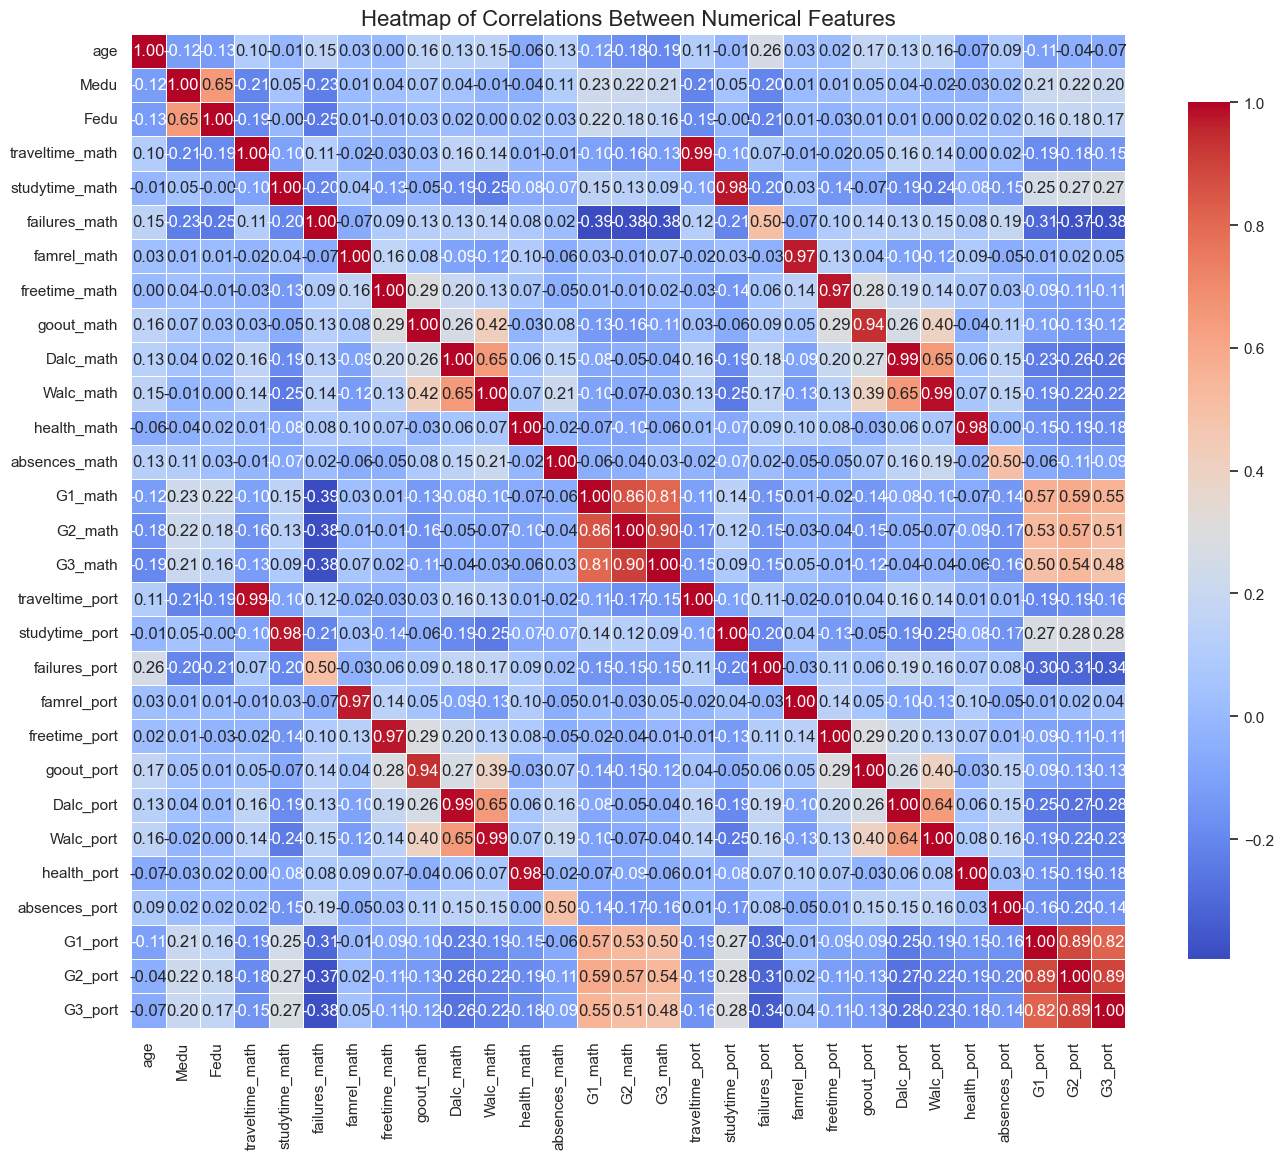

In [43]:
# Selecionar apenas colunas numéricas
numeric_data = combined_data.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = numeric_data.corr()

# Configurar o gráfico do mapa de calor
plt.figure(figsize=(14, 12))  # Ajuste o tamanho conforme necessário
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=.5)

# Configurar título e eixos
plt.title('Heatmap of Correlations Between Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

## Data Preparation <a name="data-preparation"></a>
Before modeling, we need to prepare the data. This includes handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

## Modeling <a name="modeling"></a>
In this section, we will build machine learning models to predict students' academic performance based on their alcohol consumption and other features. We will choose appropriate algorithms and fit them to our training data.

## Model Evaluation <a name="model-evaluation"></a>
After building our models, we will evaluate their performance using various metrics. We will compare the predictions against the actual outcomes to determine how well our models are performing.

## Conclusion and Next Steps <a name="conclusion-and-next-steps"></a>
In the final section, we will summarize our findings from the analysis and discuss potential next steps. This may include further analysis, model improvements, or recommendations for educators based on the insights gained from the data.